In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Import all important libararies need for CUstomer Segmentation using RFM.

In [1]:
from google.colab import files
uploaded= files.upload()

Saving OnlineRetail.csv to OnlineRetail.csv


In [4]:
retail=pd.read_csv('OnlineRetail.csv',sep=",", encoding="ISO-8859-1",header=0)

In [ ]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
retail.shape

(541909, 8)

In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Data Cleaning


In [7]:
df_null=round(100*(retail.isnull().sum())/len(retail),2)
df_null

,0
InvoiceNo,0.00
StockCode,0.00
Description,0.27
Quantity,0.00
InvoiceDate,0.00
UnitPrice,0.00
CustomerID,24.93
Country,0.00


In [8]:
retail=retail.dropna()
retail.shape

(406829, 8)

In [9]:
# Changing the data type of customer id
retail['CustomerID']=retail['CustomerID'].astype(str)

In [10]:
# Monetary total amount of transaction
retail['Amount']=retail['Quantity']*retail['UnitPrice']
rfm_m=retail.groupby('CustomerID')['Amount'].sum()
rfm_m.head()

,Amount
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


In [11]:
# Frequency = count of purchaseduring time period
rfm_f=retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f=rfm_f.reset_index()
rfm_f.columns=['CustomerID','Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [12]:
# Merging
rfm=pd.merge(rfm_m,rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [13]:
# Recency
# convert the datetime to proper datatype
retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')


In [14]:
# Compute the maximum data to the last transaction date
max_date=max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [15]:
# Compute the difference data to the last transaction date
retail['Diff']=max_date-retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [16]:
rfm_r=retail.groupby('CustomerID')['Diff'].min()
rfm_r=rfm_r.reset_index()
rfm_r.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [17]:
# Extract number of days only
rfm_r['Diff']=rfm_r['Diff'].dt.days
rfm_r.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [18]:
# Merge\
rfm=pd.merge(rfm,rfm_r,on='CustomerID',how='inner')
rfm.columns=['CustomerID','Amount','Frequency','Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Outlier Analysis


Text(0.5, 0, 'Attributes')

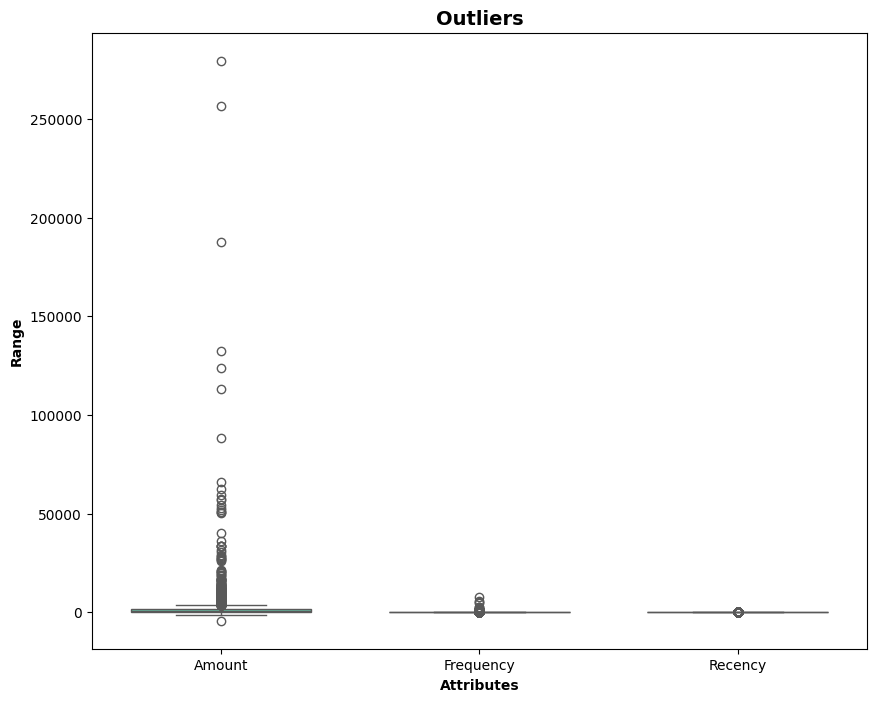

In [19]:
attributes=['Amount','Frequency','Recency']
plt.rcParams['figure.figsize']=[10,8]
sns.boxplot(data=rfm[attributes],orient='v',palette="Set2",whis=1.5,saturation=1,width=0.7)
plt.title("Outliers",fontsize=14,fontweight='bold')
plt.ylabel("Range",fontweight='bold')
plt.xlabel("Attributes",fontweight='bold')


In [20]:
# Removing (Statical) outliers for amount
Q1=rfm.Amount.quantile(0.05)
Q3=rfm.Amount.quantile(0.95)
IQR=Q3-Q1
rfm=rfm[(rfm.Amount>=Q1-1.5*IQR)&(rfm.Amount<=Q3+1.5*IQR)]

# Removing statical outliers for frequency
Q1=rfm.Frequency.quantile(0.05)
Q3=rfm.Frequency.quantile(0.95)
IQR=Q3-Q1
rfm=rfm[(rfm.Frequency>=Q1-1.5*IQR)&(rfm.Frequency<=Q3+1.5*IQR)]

# Removing Recency statical outlier
Q1=rfm.Recency.quantile(0.05)
Q3=rfm.Recency.quantile(0.095)
IQR=Q3-Q1
rfm=rfm[(rfm.Recency>= Q1- 1.5*IQR)&(rfm.Recency<=1.5*IQR)]



Scaling The features

In [21]:
rfm_df=rfm[['Amount','Frequency','Recency']]
# Instantiate
scaler=StandardScaler()
# fit transform
rfm_df_scaled=scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(377, 3)

Elbow curve to get the right number of cludters

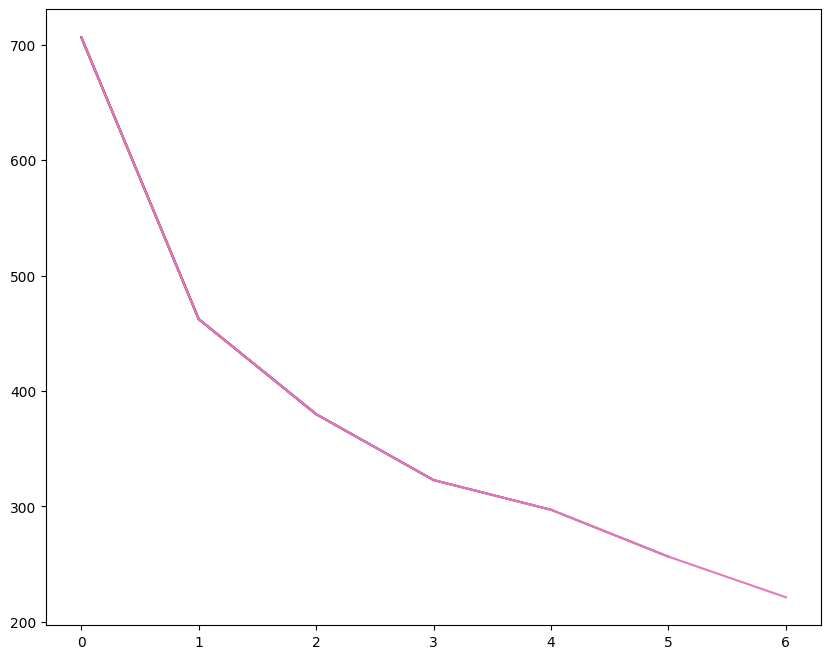

In [25]:
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_cluster in range_n_clusters:
    kmeans=KMeans(n_clusters=num_cluster,max_iter=50)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)

    # plot the SSDs for each n_clusters
    plt.plot(ssd)

In [28]:
# Final model with K = 3
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [29]:
kmeans.labels_

array([2, 2, 1, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2,
       1, 0, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 0,
       0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2,
       0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1,
       1, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2,
       0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1,
       1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0,

In [30]:
rfm['Cluster_ID']=kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_ID
1,12347.0,4310.00,182,1,2
11,12358.0,1168.06,19,1,2
15,12362.0,5154.58,274,2,1
19,12367.0,168.90,11,3,0
25,12375.0,455.42,18,2,0


<Axes: xlabel='Cluster_ID', ylabel='Amount'>

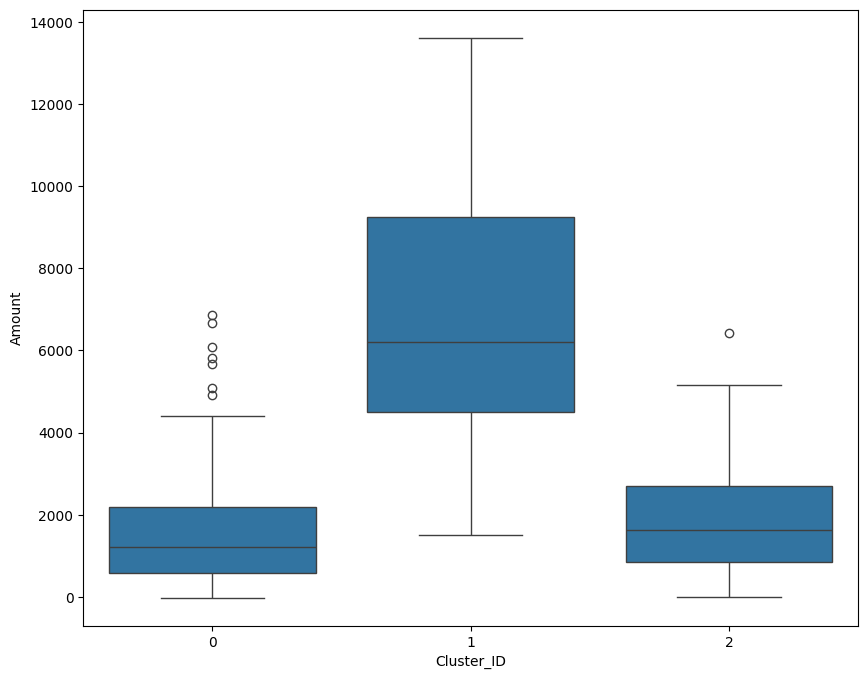

In [31]:
# Box plot
sns.boxplot(x='Cluster_ID',y='Amount',data=rfm)

<Axes: xlabel='Cluster_ID', ylabel='Frequency'>

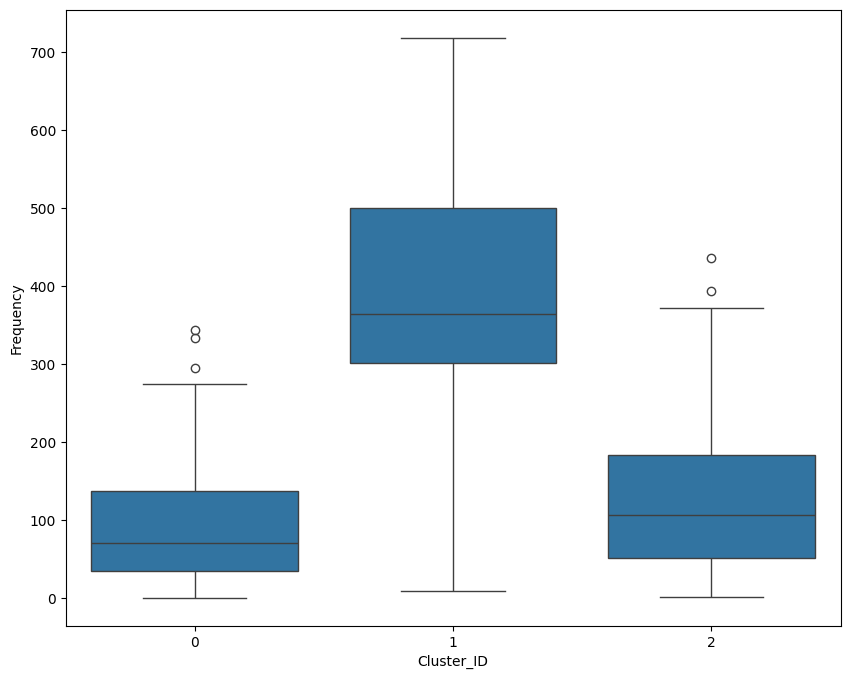

In [32]:
sns.boxplot(x='Cluster_ID',y='Frequency',data=rfm)

<Axes: xlabel='Cluster_ID', ylabel='Recency'>

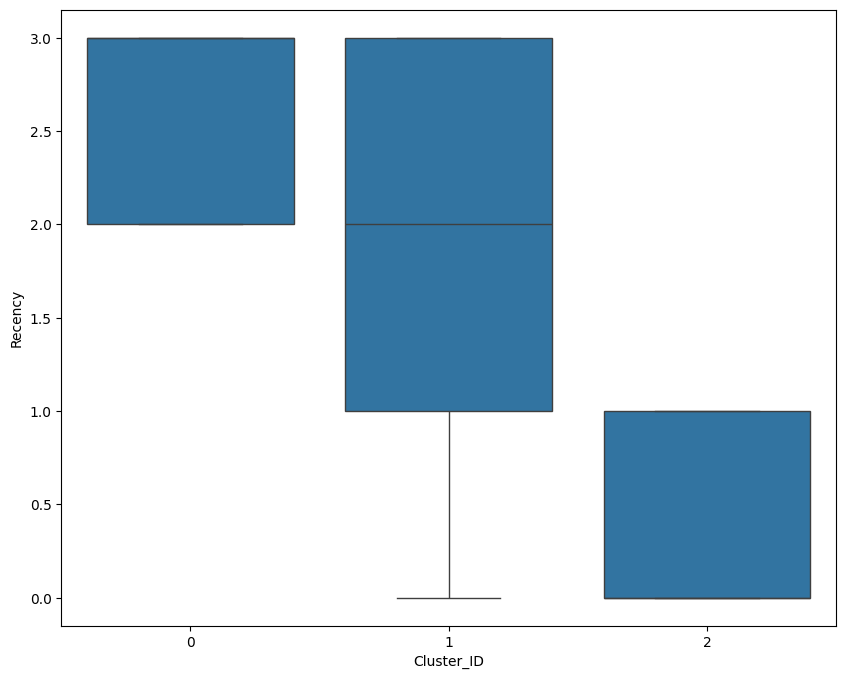

In [33]:
sns.boxplot(x='Cluster_ID',y='Recency',data=rfm)